# 1. Data Extraction

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup 
import json

In [2]:
data=pd.read_excel('input.xlsx')

In [3]:
df=pd.DataFrame(data)

In [4]:
df

,URL_ID,URL
0,37,https://insights.blackcoffer.com/ai-in-healthc...
1,38,https://insights.blackcoffer.com/what-if-the-c...
2,39,https://insights.blackcoffer.com/what-jobs-wil...
3,40,https://insights.blackcoffer.com/will-machine-...
4,41,https://insights.blackcoffer.com/will-ai-repla...
...,...,...
108,146,https://insights.blackcoffer.com/blockchain-fo...
109,147,https://insights.blackcoffer.com/the-future-of...
110,148,https://insights.blackcoffer.com/big-data-anal...
111,149,https://insights.blackcoffer.com/business-anal...


In [5]:
df1=df['URL'].tolist()

In [6]:
df1

['https://insights.blackcoffer.com/ai-in-healthcare-to-improve-patient-outcomes/',
 'https://insights.blackcoffer.com/what-if-the-creation-is-taking-over-the-creator/',
 'https://insights.blackcoffer.com/what-jobs-will-robots-take-from-humans-in-the-future/',
 'https://insights.blackcoffer.com/will-machine-replace-the-human-in-the-future-of-work/',
 'https://insights.blackcoffer.com/will-ai-replace-us-or-work-with-us/',
 'https://insights.blackcoffer.com/man-and-machines-together-machines-are-more-diligent-than-humans-blackcoffe/',
 'https://insights.blackcoffer.com/in-future-or-in-upcoming-years-humans-and-machines-are-going-to-work-together-in-every-field-of-work/',
 'https://insights.blackcoffer.com/how-neural-networks-can-be-applied-in-various-areas-in-the-future/',
 'https://insights.blackcoffer.com/how-machine-learning-will-affect-your-business/',
 'https://insights.blackcoffer.com/deep-learning-impact-on-areas-of-e-learning/',
 'https://insights.blackcoffer.com/how-to-protect-fu

In [7]:
del df1[7]  #removing broken links(404 not found )

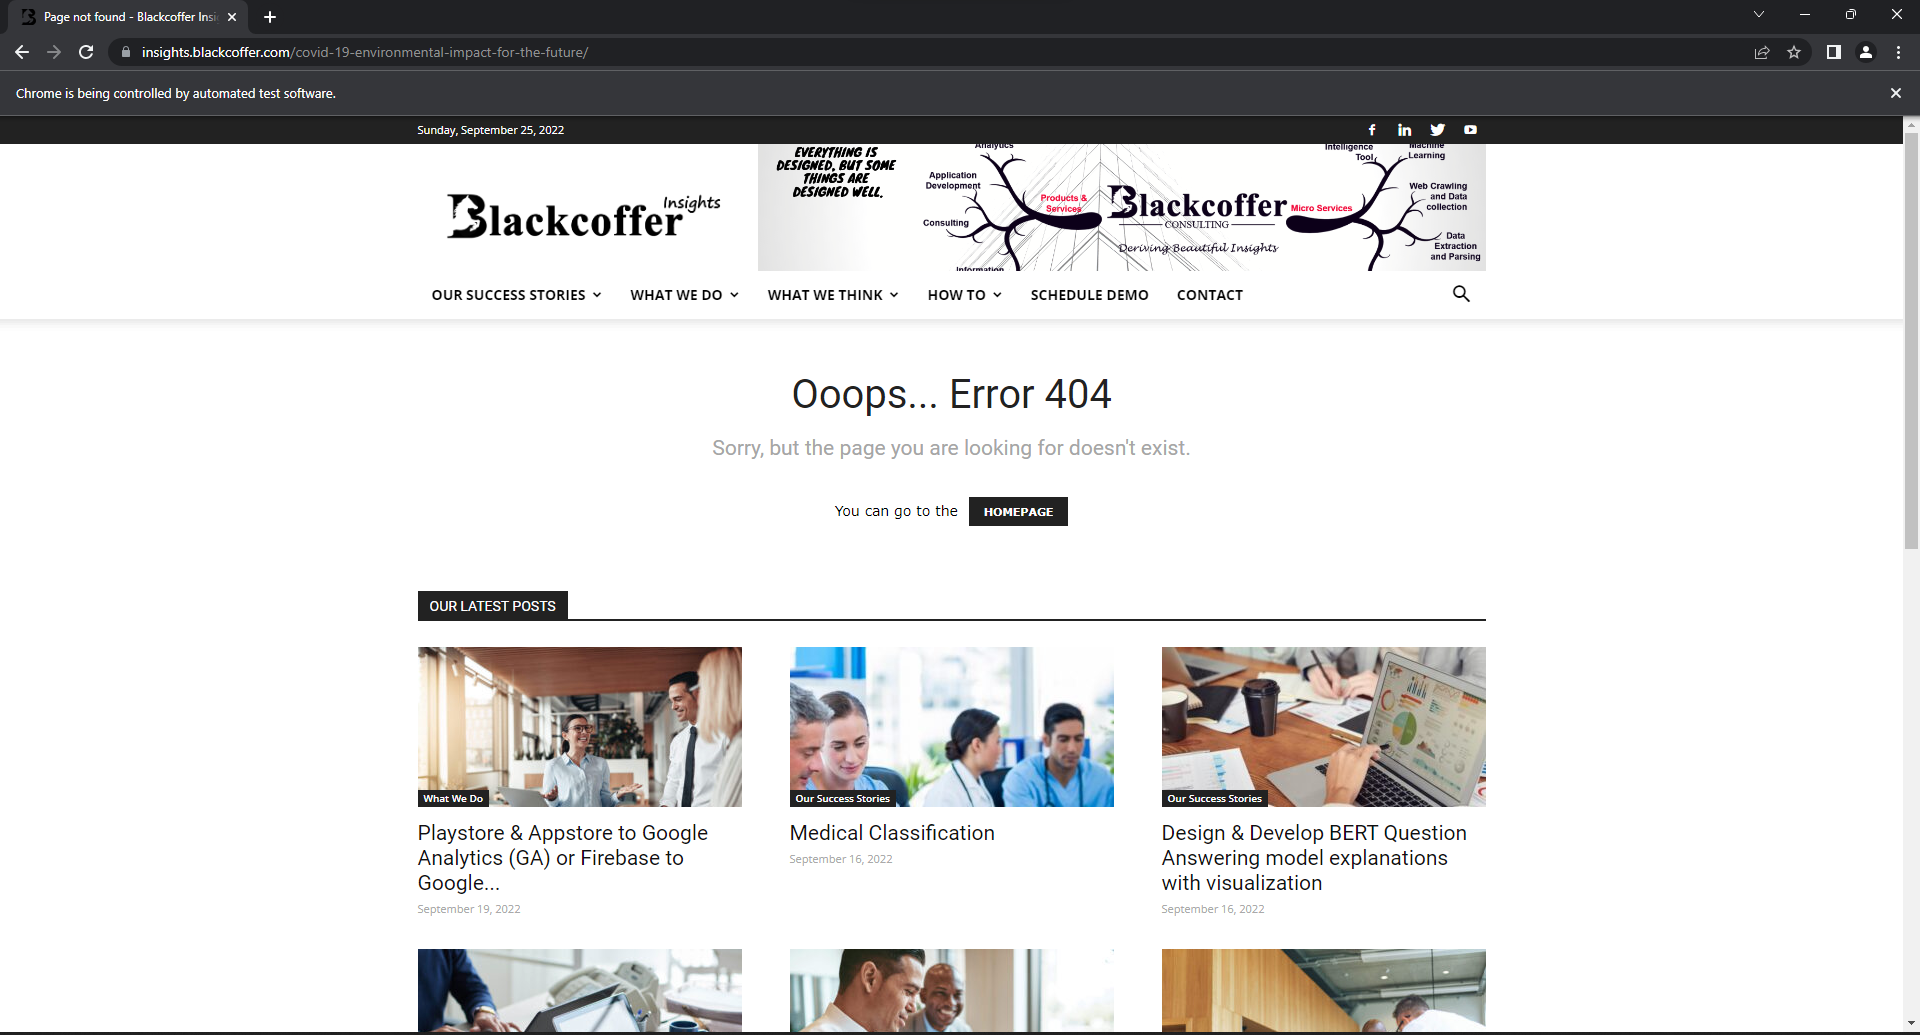

In [8]:
del df1[105]

In [9]:
info=[]

In [10]:
def extract_content(url, soup): 
    return { 
        "content": soup.find('div',{'class':'td-post-content'}).get_text()
    } 
for url in df1: 
    driver = webdriver.Chrome("C:\chromedriver.exe") 
    driver.get(url)
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    info.append(extract_content(url, soup))
    driver.quit()
print(info)

[{'content': '\nIntroduction\n“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.\nAfter the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large chunks of data could 

In [12]:
i=37
for elements in info:
    with open(f'C:\data\{i}.txt', 'w') as file:
         file.write(json.dumps(elements))
         i=i+1

In [13]:
Df=pd.DataFrame(info)

In [14]:
Df

,content
0,\nIntroduction\n“If anything kills over 10 mil...
1,"\nHuman minds, a fascination in itself carryin..."
2,\nIntroduction\nAI is rapidly evolving in the ...
3,\n“Anything that could give rise to smarter-th...
4,\n“Machine intelligence is the last invention ...
...,...
106,\nReconciling with the financial realities of ...
107,\nWhat Is an Investment?\nAn investment is a r...
108,\nQuality and affordable healthcare is a visio...
109,\nAnalytics is a statistical scientific proces...


# 2. Data Preprocessing 

In [15]:
Df['content']=Df['content'].apply(str)

In [16]:
Df

,content
0,\nIntroduction\n“If anything kills over 10 mil...
1,"\nHuman minds, a fascination in itself carryin..."
2,\nIntroduction\nAI is rapidly evolving in the ...
3,\n“Anything that could give rise to smarter-th...
4,\n“Machine intelligence is the last invention ...
...,...
106,\nReconciling with the financial realities of ...
107,\nWhat Is an Investment?\nAn investment is a r...
108,\nQuality and affordable healthcare is a visio...
109,\nAnalytics is a statistical scientific proces...


In [17]:
import nltk
from nltk.tokenize import word_tokenize 

In [19]:
Df["content"] = Df.apply(lambda x: nltk.word_tokenize(x),axis=1) 

In [20]:
Df

,content
0,"[Introduction, “, If, anything, kills, over, 1..."
1,"[Human, minds, ,, a, fascination, in, itself, ..."
2,"[Introduction, AI, is, rapidly, evolving, in, ..."
3,"[“, Anything, that, could, give, rise, to, sma..."
4,"[“, Machine, intelligence, is, the, last, inve..."
...,...
106,"[Reconciling, with, the, financial, realities,..."
107,"[What, Is, an, Investment, ?, An, investment, ..."
108,"[Quality, and, affordable, healthcare, is, a, ..."
109,"[Analytics, is, a, statistical, scientific, pr..."


# 3. Text Analysis

# 3.1 Sentiment Analysis

3.1.1 Removing Stop Words

In [21]:
stop1= pd.read_csv('StopWords_Auditor.txt', delimiter = "\t").values.tolist()
stop2= pd.read_csv('StopWords_Currencies.txt',encoding='latin-1', delimiter = "\t").values.tolist()
stop3= pd.read_csv('StopWords_DatesandNumbers.txt', delimiter = "\t").values.tolist()
stop4= pd.read_csv('StopWords_Generic.txt', delimiter = "\t").values.tolist()
stop5= pd.read_csv('StopWords_GenericLong.txt', delimiter = "\t").values.tolist()
stop6= pd.read_csv('StopWords_Geographic.txt', delimiter = "\t").values.tolist()
stop7= pd.read_csv('StopWords_Names.txt', delimiter = "\t").values.tolist()

In [22]:
import itertools
CustomStopWord= itertools.chain(stop1,stop2,stop3,stop4,stop4,stop5,stop6)
list(CustomStopWord)


[['YOUNG'],
 ['DELOITTE'],
 ['TOUCHE'],
 ['KPMG'],
 ['PRICEWATERHOUSECOOPERS'],
 ['PRICEWATERHOUSE'],
 ['COOPERS'],
 ['ARIARY | Madagascar '],
 ['BAHT | Thailand '],
 ['BALBOA | Panama '],
 ['BIRR | Ethiopia '],
 ['BOLIVAR | Venezuela '],
 ['BOLIVIANO  | Bolivia '],
 ['CEDI | Ghana '],
 ['COLON  | Costa Rica '],
 ['CÓRDOBA  | Nicaragua '],
 ['DALASI | Gambia '],
 ['DENAR | Macedonia (Former Yug. Rep.) '],
 ['DINAR | Algeria '],
 ['DIRHAM  | Morocco '],
 ['DOBRA | São Tom and Príncipe '],
 ['DONG | Vietnam '],
 ['DRAM | Armenia '],
 ['ESCUDO  | Cape Verde '],
 ['EURO  | Belgium '],
 ['FLORIN | Aruba '],
 ['FORINT | Hungary '],
 ['GOURDE | Haiti '],
 ['GUARANI | Paraguay '],
 ['GULDEN | Netherlands Antilles '],
 ['HRYVNIA  | Ukraine '],
 ['KINA | Papua New Guinea '],
 ['KIP | Laos '],
 ['KONVERTIBILNA MARKA  | Bosnia-Herzegovina '],
 ['KORUNA  | Czech Republic '],
 ['KRONA | Sweden '],
 ['KRONE | Denmark '],
 ['KROON | Estonia '],
 ['KUNA | Croatia '],
 ['KWACHA | Zambia '],
 ['KWANZA | 

In [23]:
def removeStopwords(txt):
    txt_clean = [word for word in txt if word not in CustomStopWord]
    return txt_clean

Df['content']=Df['content'].apply(lambda x: removeStopwords(x))
Df

,content
0,"[Introduction, “, If, anything, kills, over, 1..."
1,"[Human, minds, ,, a, fascination, in, itself, ..."
2,"[Introduction, AI, is, rapidly, evolving, in, ..."
3,"[“, Anything, that, could, give, rise, to, sma..."
4,"[“, Machine, intelligence, is, the, last, inve..."
...,...
106,"[Reconciling, with, the, financial, realities,..."
107,"[What, Is, an, Investment, ?, An, investment, ..."
108,"[Quality, and, affordable, healthcare, is, a, ..."
109,"[Analytics, is, a, statistical, scientific, pr..."


3.1.2 Creating dictionary of Positive and Negative words

In [24]:
positiveWords= pd.read_csv('positive-words.txt', delimiter = "\t").values.tolist()
negativeWords= pd.read_csv('negative-words.txt',encoding='latin-1', delimiter = "\t").values.tolist()

In [25]:
positiveWords

[['abound'],
 ['abounds'],
 ['abundance'],
 ['abundant'],
 ['accessable'],
 ['accessible'],
 ['acclaim'],
 ['acclaimed'],
 ['acclamation'],
 ['accolade'],
 ['accolades'],
 ['accommodative'],
 ['accomodative'],
 ['accomplish'],
 ['accomplished'],
 ['accomplishment'],
 ['accomplishments'],
 ['accurate'],
 ['accurately'],
 ['achievable'],
 ['achievement'],
 ['achievements'],
 ['achievible'],
 ['acumen'],
 ['adaptable'],
 ['adaptive'],
 ['adequate'],
 ['adjustable'],
 ['admirable'],
 ['admirably'],
 ['admiration'],
 ['admire'],
 ['admirer'],
 ['admiring'],
 ['admiringly'],
 ['adorable'],
 ['adore'],
 ['adored'],
 ['adorer'],
 ['adoring'],
 ['adoringly'],
 ['adroit'],
 ['adroitly'],
 ['adulate'],
 ['adulation'],
 ['adulatory'],
 ['advanced'],
 ['advantage'],
 ['advantageous'],
 ['advantageously'],
 ['advantages'],
 ['adventuresome'],
 ['adventurous'],
 ['advocate'],
 ['advocated'],
 ['advocates'],
 ['affability'],
 ['affable'],
 ['affably'],
 ['affectation'],
 ['affection'],
 ['affectionate

3.1.3 Extracting Derived variables

In [26]:
#Positive Score
def countPositive(x):
    i=0
    for word in x:
        for y in positiveWords:
            if word in y:
                i=i+1
    return i

In [27]:
Df['positive score']=Df['content'].apply(lambda x: countPositive(x))

In [28]:
Df

,content,positive score
0,"[Introduction, “, If, anything, kills, over, 1...",76
1,"[Human, minds, ,, a, fascination, in, itself, ...",65
2,"[Introduction, AI, is, rapidly, evolving, in, ...",73
3,"[“, Anything, that, could, give, rise, to, sma...",72
4,"[“, Machine, intelligence, is, the, last, inve...",58
...,...,...
106,"[Reconciling, with, the, financial, realities,...",29
107,"[What, Is, an, Investment, ?, An, investment, ...",47
108,"[Quality, and, affordable, healthcare, is, a, ...",30
109,"[Analytics, is, a, statistical, scientific, pr...",33


In [29]:
#Negative Score
def countNegative(x):
    i=0
    for word in x:
        for y in negativeWords:
            if word in y:
                i=i+1
    return i

In [30]:
Df['negative score']=Df['content'].apply(lambda x: countNegative(x))

In [31]:
Df

,content,positive score,negative score
0,"[Introduction, “, If, anything, kills, over, 1...",76,33
1,"[Human, minds, ,, a, fascination, in, itself, ...",65,38
2,"[Introduction, AI, is, rapidly, evolving, in, ...",73,35
3,"[“, Anything, that, could, give, rise, to, sma...",72,25
4,"[“, Machine, intelligence, is, the, last, inve...",58,25
...,...,...,...
106,"[Reconciling, with, the, financial, realities,...",29,28
107,"[What, Is, an, Investment, ?, An, investment, ...",47,12
108,"[Quality, and, affordable, healthcare, is, a, ...",30,44
109,"[Analytics, is, a, statistical, scientific, pr...",33,4


In [32]:
# Polarity Score
def Polarity(x,y):
    Polarity_Score=0
    Polarity_Score=((x - y)/ (x + y) + 0.000001)
    return Polarity_Score


In [33]:
Df['polarity score']=Df.apply(lambda x: Polarity(x['positive score'],x['negative score']),axis = 1)

In [34]:
Df

,content,positive score,negative score,polarity score
0,"[Introduction, “, If, anything, kills, over, 1...",76,33,0.394496
1,"[Human, minds, ,, a, fascination, in, itself, ...",65,38,0.262137
2,"[Introduction, AI, is, rapidly, evolving, in, ...",73,35,0.351853
3,"[“, Anything, that, could, give, rise, to, sma...",72,25,0.484537
4,"[“, Machine, intelligence, is, the, last, inve...",58,25,0.397591
...,...,...,...,...
106,"[Reconciling, with, the, financial, realities,...",29,28,0.017545
107,"[What, Is, an, Investment, ?, An, investment, ...",47,12,0.593221
108,"[Quality, and, affordable, healthcare, is, a, ...",30,44,-0.189188
109,"[Analytics, is, a, statistical, scientific, pr...",33,4,0.783785


In [35]:
#Subjectivity Score
def Subjectivity(x,y,n):
    Subjectivity_Score=0
    Subjectivity_Score=((x + y)/ (n) + 0.000001)
    return Subjectivity_Score

In [36]:
Df['subjectivity score']=Df.apply(lambda x: Subjectivity(x['positive score'],x['negative score'],len(x['content'])),axis = 1)

In [37]:
Df

,content,positive score,negative score,polarity score,subjectivity score
0,"[Introduction, “, If, anything, kills, over, 1...",76,33,0.394496,0.054176
1,"[Human, minds, ,, a, fascination, in, itself, ...",65,38,0.262137,0.062729
2,"[Introduction, AI, is, rapidly, evolving, in, ...",73,35,0.351853,0.056339
3,"[“, Anything, that, could, give, rise, to, sma...",72,25,0.484537,0.052949
4,"[“, Machine, intelligence, is, the, last, inve...",58,25,0.397591,0.041941
...,...,...,...,...,...
106,"[Reconciling, with, the, financial, realities,...",29,28,0.017545,0.056270
107,"[What, Is, an, Investment, ?, An, investment, ...",47,12,0.593221,0.033448
108,"[Quality, and, affordable, healthcare, is, a, ...",30,44,-0.189188,0.057100
109,"[Analytics, is, a, statistical, scientific, pr...",33,4,0.783785,0.046777


# 4.Analysis of Readability

4.1 Average Sentence Length

In [39]:
def AvgSentenceLength(x,y):
    average_sentence_length=x/y
    return average_sentence_length

In [40]:
Df['average sentence length']=Df['content'].apply(lambda x:AvgSentenceLength(len(x), x.count('.')))

In [41]:
Df

,content,positive score,negative score,polarity score,subjectivity score,average sentence length
0,"[Introduction, “, If, anything, kills, over, 1...",76,33,0.394496,0.054176,27.189189
1,"[Human, minds, ,, a, fascination, in, itself, ...",65,38,0.262137,0.062729,24.147059
2,"[Introduction, AI, is, rapidly, evolving, in, ...",73,35,0.351853,0.056339,22.821429
3,"[“, Anything, that, could, give, rise, to, sma...",72,25,0.484537,0.052949,22.617284
4,"[“, Machine, intelligence, is, the, last, inve...",58,25,0.397591,0.041941,27.486111
...,...,...,...,...,...,...
106,"[Reconciling, with, the, financial, realities,...",29,28,0.017545,0.056270,21.553191
107,"[What, Is, an, Investment, ?, An, investment, ...",47,12,0.593221,0.033448,29.898305
108,"[Quality, and, affordable, healthcare, is, a, ...",30,44,-0.189188,0.057100,19.938462
109,"[Analytics, is, a, statistical, scientific, pr...",33,4,0.783785,0.046777,28.250000


4.2 Percentage of Complex words

In [ ]:
def ComplexWordPercent(array):
    complexwords=[]
    for word in array:
        word = word.lower()
        count = 0
        Sum=0
        vowels = "aeiouy"
        if word[0] in vowels:
            count += 1
        for i in range(1, len(word)):
            if word[i] in vowels and word[i - 1] not in vowels:
                count += 1
        if word.endswith("es" or "ed"):
            count -= 1
        if count>=2:
            present=1
            complexwords.append(present)
    Sum=sum(complexwords)
    return Sum

In [94]:
Df['percentage of complex words']=Df['content'].apply(lambda x:ComplexWordPercent(x)/x.count('.'))

In [95]:
Df

,content,positive score,negative score,polarity score,subjectivity score,average sentence length,percentage of complex words,fog index,complex words,average number of words per sentence,word count,unique word count
0,"[Introduction, “, If, anything, kills, over, 1...",76,33,0.394496,0.054176,27.189189,13.445946,15.772973,906,11.581081,1814,850
1,"[Human, minds, ,, a, fascination, in, itself, ...",65,38,0.262137,0.062729,24.147059,8.632353,12.582353,497,8.867647,1453,598
2,"[Introduction, AI, is, rapidly, evolving, in, ...",73,35,0.351853,0.056339,22.821429,10.416667,12.952381,803,8.880952,1734,742
3,"[“, Anything, that, could, give, rise, to, sma...",72,25,0.484537,0.052949,22.617284,9.172840,12.113580,621,8.172840,1666,657
4,"[“, Machine, intelligence, is, the, last, inve...",58,25,0.397591,0.041941,27.486111,11.194444,14.938889,710,11.138889,1798,794
...,...,...,...,...,...,...,...,...,...,...,...,...
106,"[Reconciling, with, the, financial, realities,...",29,28,0.017545,0.056270,21.553191,9.680851,12.085106,407,11.170213,930,519
107,"[What, Is, an, Investment, ?, An, investment, ...",47,12,0.593221,0.033448,29.898305,12.508475,16.291525,639,11.966102,1598,699
108,"[Quality, and, affordable, healthcare, is, a, ...",30,44,-0.189188,0.057100,19.938462,8.723077,11.169231,519,7.446154,1186,478
109,"[Analytics, is, a, statistical, scientific, pr...",33,4,0.783785,0.046777,28.250000,13.607143,16.200000,343,14.000000,727,386


4.3 Fog Index

In [45]:
def fogIndex(x,y):
    fogindex=0.4*(x+y)
    return fogindex
            

In [46]:
Df['fog index']=Df.apply(lambda x: fogIndex(x['average sentence length'],x['percentage of complex words']),axis = 1)

In [47]:
Df

,content,positive score,negative score,polarity score,subjectivity score,average sentence length,percentage of complex words,fog index
0,"[Introduction, “, If, anything, kills, over, 1...",76,33,0.394496,0.054176,27.189189,12.243243,15.772973
1,"[Human, minds, ,, a, fascination, in, itself, ...",65,38,0.262137,0.062729,24.147059,7.308824,12.582353
2,"[Introduction, AI, is, rapidly, evolving, in, ...",73,35,0.351853,0.056339,22.821429,9.559524,12.952381
3,"[“, Anything, that, could, give, rise, to, sma...",72,25,0.484537,0.052949,22.617284,7.666667,12.113580
4,"[“, Machine, intelligence, is, the, last, inve...",58,25,0.397591,0.041941,27.486111,9.861111,14.938889
...,...,...,...,...,...,...,...,...
106,"[Reconciling, with, the, financial, realities,...",29,28,0.017545,0.056270,21.553191,8.659574,12.085106
107,"[What, Is, an, Investment, ?, An, investment, ...",47,12,0.593221,0.033448,29.898305,10.830508,16.291525
108,"[Quality, and, affordable, healthcare, is, a, ...",30,44,-0.189188,0.057100,19.938462,7.984615,11.169231
109,"[Analytics, is, a, statistical, scientific, pr...",33,4,0.783785,0.046777,28.250000,12.250000,16.200000


# 5. Average Number of Words Per Sentence

In [48]:
def AvgWords(x,y):
    avg=x/y
    return avg


In [56]:
Df['average number of words per sentence']=Df['content'].apply(lambda x: AvgWords(len(set(x)),x.count('.')))
Df

# 6.Complex Word Count

In [50]:
def PercentageComplexWords(array):
    complexwords=[]
    for word in array:
        word = word.lower()
        count = 0
        Sum=0
        vowels = "aeiouy"
        if word[0] in vowels:
            count += 1
        for i in range(1, len(word)):
            if word[i] in vowels and word[i - 1] not in vowels:
                count += 1
        if word.endswith("e" or "ed"):
            count -= 1
        if count>=2:
            present=1
            complexwords.append(present)
    Sum=sum(complexwords)
    return Sum

In [51]:
Df['complex words']=Df['content'].apply(lambda x:PercentageComplexWords(x))

In [57]:
Df

,content,positive score,negative score,polarity score,subjectivity score,average sentence length,percentage of complex words,fog index,complex words,average number of words per sentence
0,"[Introduction, “, If, anything, kills, over, 1...",76,33,0.394496,0.054176,27.189189,12.243243,15.772973,906,11.581081
1,"[Human, minds, ,, a, fascination, in, itself, ...",65,38,0.262137,0.062729,24.147059,7.308824,12.582353,497,8.867647
2,"[Introduction, AI, is, rapidly, evolving, in, ...",73,35,0.351853,0.056339,22.821429,9.559524,12.952381,803,8.880952
3,"[“, Anything, that, could, give, rise, to, sma...",72,25,0.484537,0.052949,22.617284,7.666667,12.113580,621,8.172840
4,"[“, Machine, intelligence, is, the, last, inve...",58,25,0.397591,0.041941,27.486111,9.861111,14.938889,710,11.138889
...,...,...,...,...,...,...,...,...,...,...
106,"[Reconciling, with, the, financial, realities,...",29,28,0.017545,0.056270,21.553191,8.659574,12.085106,407,11.170213
107,"[What, Is, an, Investment, ?, An, investment, ...",47,12,0.593221,0.033448,29.898305,10.830508,16.291525,639,11.966102
108,"[Quality, and, affordable, healthcare, is, a, ...",30,44,-0.189188,0.057100,19.938462,7.984615,11.169231,519,7.446154
109,"[Analytics, is, a, statistical, scientific, pr...",33,4,0.783785,0.046777,28.250000,12.250000,16.200000,343,14.000000


# 7.Word Count

In [85]:
def WordCount(x):
    list1=(x)
    removelist=[',','?','!','“','%','(',')','.'] 
    list1=[elem for elem in list1 if elem not in removelist]
    length=len(list1)
    return length


In [86]:
Df['word count']=Df['content'].apply(lambda x : WordCount(x))

In [87]:
Df

,content,positive score,negative score,polarity score,subjectivity score,average sentence length,percentage of complex words,fog index,complex words,average number of words per sentence,word count
0,"[Introduction, “, If, anything, kills, over, 1...",76,33,0.394496,0.054176,27.189189,12.243243,15.772973,906,11.581081,1814
1,"[Human, minds, ,, a, fascination, in, itself, ...",65,38,0.262137,0.062729,24.147059,7.308824,12.582353,497,8.867647,1453
2,"[Introduction, AI, is, rapidly, evolving, in, ...",73,35,0.351853,0.056339,22.821429,9.559524,12.952381,803,8.880952,1734
3,"[“, Anything, that, could, give, rise, to, sma...",72,25,0.484537,0.052949,22.617284,7.666667,12.113580,621,8.172840,1666
4,"[“, Machine, intelligence, is, the, last, inve...",58,25,0.397591,0.041941,27.486111,9.861111,14.938889,710,11.138889,1798
...,...,...,...,...,...,...,...,...,...,...,...
106,"[Reconciling, with, the, financial, realities,...",29,28,0.017545,0.056270,21.553191,8.659574,12.085106,407,11.170213,930
107,"[What, Is, an, Investment, ?, An, investment, ...",47,12,0.593221,0.033448,29.898305,10.830508,16.291525,639,11.966102,1598
108,"[Quality, and, affordable, healthcare, is, a, ...",30,44,-0.189188,0.057100,19.938462,7.984615,11.169231,519,7.446154,1186
109,"[Analytics, is, a, statistical, scientific, pr...",33,4,0.783785,0.046777,28.250000,12.250000,16.200000,343,14.000000,727


In [88]:
def UniqueWordCount(x):
    list1=(x)
    removelist=[',','?','!','“','%','(',')','.'] 
    list1=[elem for elem in list1 if elem not in removelist]
    myset=set(list1)
    length=len(myset)
    return length


In [89]:
Df['unique word count']=Df['content'].apply(lambda x :UniqueWordCount(x) )

In [90]:
Df

,content,positive score,negative score,polarity score,subjectivity score,average sentence length,percentage of complex words,fog index,complex words,average number of words per sentence,word count,unique word count
0,"[Introduction, “, If, anything, kills, over, 1...",76,33,0.394496,0.054176,27.189189,12.243243,15.772973,906,11.581081,1814,850
1,"[Human, minds, ,, a, fascination, in, itself, ...",65,38,0.262137,0.062729,24.147059,7.308824,12.582353,497,8.867647,1453,598
2,"[Introduction, AI, is, rapidly, evolving, in, ...",73,35,0.351853,0.056339,22.821429,9.559524,12.952381,803,8.880952,1734,742
3,"[“, Anything, that, could, give, rise, to, sma...",72,25,0.484537,0.052949,22.617284,7.666667,12.113580,621,8.172840,1666,657
4,"[“, Machine, intelligence, is, the, last, inve...",58,25,0.397591,0.041941,27.486111,9.861111,14.938889,710,11.138889,1798,794
...,...,...,...,...,...,...,...,...,...,...,...,...
106,"[Reconciling, with, the, financial, realities,...",29,28,0.017545,0.056270,21.553191,8.659574,12.085106,407,11.170213,930,519
107,"[What, Is, an, Investment, ?, An, investment, ...",47,12,0.593221,0.033448,29.898305,10.830508,16.291525,639,11.966102,1598,699
108,"[Quality, and, affordable, healthcare, is, a, ...",30,44,-0.189188,0.057100,19.938462,7.984615,11.169231,519,7.446154,1186,478
109,"[Analytics, is, a, statistical, scientific, pr...",33,4,0.783785,0.046777,28.250000,12.250000,16.200000,343,14.000000,727,386


# 8.Syllable Count Per Word

In [99]:
def syllableCount(array):
    count = 0
    for word in array:
        word = word.lower()
        Sum=0
        vowels = "aeiouy"
        if word[0] in vowels:
            count += 1
        for i in range(1, len(word)):
            if word[i] in vowels and word[i - 1] not in vowels:
                count += 1
        if word.endswith("es"or"ed"):
            count -= 1
    return count

In [100]:
Df['syllable count']=Df['content'].apply(lambda x:syllableCount(x))

In [101]:
Df

,content,positive score,negative score,polarity score,subjectivity score,average sentence length,percentage of complex words,fog index,complex words,average number of words per sentence,word count,unique word count,syllable count
0,"[Introduction, “, If, anything, kills, over, 1...",76,33,0.394496,0.054176,27.189189,13.445946,15.772973,906,11.581081,1814,850,3513
1,"[Human, minds, ,, a, fascination, in, itself, ...",65,38,0.262137,0.062729,24.147059,8.632353,12.582353,497,8.867647,1453,598,2362
2,"[Introduction, AI, is, rapidly, evolving, in, ...",73,35,0.351853,0.056339,22.821429,10.416667,12.952381,803,8.880952,1734,742,3264
3,"[“, Anything, that, could, give, rise, to, sma...",72,25,0.484537,0.052949,22.617284,9.172840,12.113580,621,8.172840,1666,657,2841
4,"[“, Machine, intelligence, is, the, last, inve...",58,25,0.397591,0.041941,27.486111,11.194444,14.938889,710,11.138889,1798,794,3066
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,"[Reconciling, with, the, financial, realities,...",29,28,0.017545,0.056270,21.553191,9.680851,12.085106,407,11.170213,930,519,1671
107,"[What, Is, an, Investment, ?, An, investment, ...",47,12,0.593221,0.033448,29.898305,12.508475,16.291525,639,11.966102,1598,699,2725
108,"[Quality, and, affordable, healthcare, is, a, ...",30,44,-0.189188,0.057100,19.938462,8.723077,11.169231,519,7.446154,1186,478,2119
109,"[Analytics, is, a, statistical, scientific, pr...",33,4,0.783785,0.046777,28.250000,13.607143,16.200000,343,14.000000,727,386,1438


# 9.Personal Pronouns

In [120]:
import re
pronounRegex = re.compile(r'\b(I|we|my|ours|(?-i:us))\b',re.I)
str1 = " "
def PronounsCount(x):
    mystring=str1.join(x)
    pronouns = pronounRegex.findall(mystring)
    length=len(pronouns)
    return length


In [121]:
Df['pronouns count']=Df['content'].apply(lambda x:PronounsCount(x))

In [122]:
Df

,content,positive score,negative score,polarity score,subjectivity score,average sentence length,percentage of complex words,fog index,complex words,average number of words per sentence,word count,unique word count,syllable count,pronouns count
0,"[Introduction, “, If, anything, kills, over, 1...",76,33,0.394496,0.054176,27.189189,13.445946,15.772973,906,11.581081,1814,850,3513,1
1,"[Human, minds, ,, a, fascination, in, itself, ...",65,38,0.262137,0.062729,24.147059,8.632353,12.582353,497,8.867647,1453,598,2362,7
2,"[Introduction, AI, is, rapidly, evolving, in, ...",73,35,0.351853,0.056339,22.821429,10.416667,12.952381,803,8.880952,1734,742,3264,3
3,"[“, Anything, that, could, give, rise, to, sma...",72,25,0.484537,0.052949,22.617284,9.172840,12.113580,621,8.172840,1666,657,2841,17
4,"[“, Machine, intelligence, is, the, last, inve...",58,25,0.397591,0.041941,27.486111,11.194444,14.938889,710,11.138889,1798,794,3066,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,"[Reconciling, with, the, financial, realities,...",29,28,0.017545,0.056270,21.553191,9.680851,12.085106,407,11.170213,930,519,1671,9
107,"[What, Is, an, Investment, ?, An, investment, ...",47,12,0.593221,0.033448,29.898305,12.508475,16.291525,639,11.966102,1598,699,2725,2
108,"[Quality, and, affordable, healthcare, is, a, ...",30,44,-0.189188,0.057100,19.938462,8.723077,11.169231,519,7.446154,1186,478,2119,2
109,"[Analytics, is, a, statistical, scientific, pr...",33,4,0.783785,0.046777,28.250000,13.607143,16.200000,343,14.000000,727,386,1438,0


# 10.Average Word Length

In [130]:
def averageWorldLength(x):
    characterlength=0
    for character in x:
        characterlength=characterlength+len(character)
    word=len(x)
    avg=characterlength/word
    return avg
    


In [131]:
Df['average word length']=Df['content'].apply(lambda x: averageWorldLength(x))

In [132]:
Df

,content,positive score,negative score,polarity score,subjectivity score,average sentence length,percentage of complex words,fog index,complex words,average number of words per sentence,word count,unique word count,syllable count,pronouns count,average word length
0,"[Introduction, “, If, anything, kills, over, 1...",76,33,0.394496,0.054176,27.189189,13.445946,15.772973,906,11.581081,1814,850,3513,1,5.160040
1,"[Human, minds, ,, a, fascination, in, itself, ...",65,38,0.262137,0.062729,24.147059,8.632353,12.582353,497,8.867647,1453,598,2362,7,4.302680
2,"[Introduction, AI, is, rapidly, evolving, in, ...",73,35,0.351853,0.056339,22.821429,10.416667,12.952381,803,8.880952,1734,742,3264,3,4.912363
3,"[“, Anything, that, could, give, rise, to, sma...",72,25,0.484537,0.052949,22.617284,9.172840,12.113580,621,8.172840,1666,657,2841,17,4.428493
4,"[“, Machine, intelligence, is, the, last, inve...",58,25,0.397591,0.041941,27.486111,11.194444,14.938889,710,11.138889,1798,794,3066,16,4.612936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,"[Reconciling, with, the, financial, realities,...",29,28,0.017545,0.056270,21.553191,9.680851,12.085106,407,11.170213,930,519,1671,9,4.950642
107,"[What, Is, an, Investment, ?, An, investment, ...",47,12,0.593221,0.033448,29.898305,12.508475,16.291525,639,11.966102,1598,699,2725,2,4.667234
108,"[Quality, and, affordable, healthcare, is, a, ...",30,44,-0.189188,0.057100,19.938462,8.723077,11.169231,519,7.446154,1186,478,2119,2,4.658179
109,"[Analytics, is, a, statistical, scientific, pr...",33,4,0.783785,0.046777,28.250000,13.607143,16.200000,343,14.000000,727,386,1438,0,5.260430


# 11.Saving Output File

In [136]:
Df['content']=df1

In [137]:
Df


,content,positive score,negative score,polarity score,subjectivity score,average sentence length,percentage of complex words,fog index,complex words,average number of words per sentence,word count,unique word count,syllable count,pronouns count,average word length
0,https://insights.blackcoffer.com/ai-in-healthc...,76,33,0.394496,0.054176,27.189189,13.445946,15.772973,906,11.581081,1814,850,3513,1,5.160040
1,https://insights.blackcoffer.com/what-if-the-c...,65,38,0.262137,0.062729,24.147059,8.632353,12.582353,497,8.867647,1453,598,2362,7,4.302680
2,https://insights.blackcoffer.com/what-jobs-wil...,73,35,0.351853,0.056339,22.821429,10.416667,12.952381,803,8.880952,1734,742,3264,3,4.912363
3,https://insights.blackcoffer.com/will-machine-...,72,25,0.484537,0.052949,22.617284,9.172840,12.113580,621,8.172840,1666,657,2841,17,4.428493
4,https://insights.blackcoffer.com/will-ai-repla...,58,25,0.397591,0.041941,27.486111,11.194444,14.938889,710,11.138889,1798,794,3066,16,4.612936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,https://insights.blackcoffer.com/blockchain-fo...,29,28,0.017545,0.056270,21.553191,9.680851,12.085106,407,11.170213,930,519,1671,9,4.950642
107,https://insights.blackcoffer.com/the-future-of...,47,12,0.593221,0.033448,29.898305,12.508475,16.291525,639,11.966102,1598,699,2725,2,4.667234
108,https://insights.blackcoffer.com/big-data-anal...,30,44,-0.189188,0.057100,19.938462,8.723077,11.169231,519,7.446154,1186,478,2119,2,4.658179
109,https://insights.blackcoffer.com/business-anal...,33,4,0.783785,0.046777,28.250000,13.607143,16.200000,343,14.000000,727,386,1438,0,5.260430


In [139]:
Df.to_excel('C:\data\output.xlsx')